In [1]:
import tweepy

In [2]:
consumer_key = 'tC6t4iF7vKgzU4OvrrIxMcYA2'
consumer_secret = 'qEA6qJqoy2W1kErRUILtKt0JTdkhDpaV4z6t1AI62984nGRtZL'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)


In [5]:
auth.get_authorization_url()

In [11]:
verifier = '9163471'
access_tokens = auth.get_access_token(verifier)
auth.set_access_token(access_tokens)
api = tweepy.API(auth)

SyntaxError: invalid syntax (<ipython-input-11-39db648a4ef4>, line 4)

In [4]:
auth.set_access_token(key = '1091039378556633088-6geenpZJQfH6CHGLWjdnFSbKXFCdGE', 
                      secret = 'X4RksSZDSLHyXuw1rjfBff5ZlWuChFbWRHAEhB1Arvgra')
api = tweepy.API(auth)


In [5]:
from numpy import random
import numpy as np
import scipy.misc
import imageio
import colorsys
import requests
from io import BytesIO
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
from PIL import Image

In [6]:
def colorsort(colors):
    hues = [colorsys.rgb_to_hls(*[x[y] / 255.0 for y in range(3)])[0] for x in colors]
    return [colors[x] for x in np.argsort(hues)]

def palette(colors, width = 64, height = 64):
    # Image size
    channels = 3
    colors = colorsort(colors)
    
    # Create an empty image
    img = np.zeros((height, width * len(colors), channels), dtype=np.uint8)

    for x in range(width * len(colors)):
        for y in range(height):
            img[y][x] = colors[int(x / width)]
            
    imageio.imwrite('outfile.png', img)

In [7]:
response = api.mentions_timeline()
tweet = response[0]
image = requests.get(tweet.entities['media'][0]['media_url'], verify=False)
img = Image.open(BytesIO(image.content))
pixels = list(img.getdata())
sample_indices = list(random.choice(len(pixels), size = 10000, replace=False))
sample_pixels = [pixels[i] for i in sample_indices]
kmeans = KMeans(n_clusters=7, random_state=0).fit(sample_pixels)
kmeans_palette = [[int(x) for x in kmeans.cluster_centers_[y]] for y in range(7)]
palette(kmeans_palette)
# post_response = api.update_with_media("outfile.png", status="@sue_dee_nym", in_reply_to_status_id=tweet.id)

In [10]:
from skimage.segmentation import slic, quickshift

In [102]:
response = api.mentions_timeline()
tweet = response[0]
user = response[0].user.screen_name
image = requests.get(tweet.entities['media'][0]['media_url'], verify=False)
img = Image.open(BytesIO(image.content))

segments = slic(img, 
                n_segments=500, 
                compactness=0.5, 
                enforce_connectivity = True, 
                convert2lab = False, 
                max_size_factor=100)
colors = []
for i in range(np.max(segments)):
    idx = np.argwhere(segments == i)
    np.array(img)[idx[:, 0], idx[:,1], :]
    colors.append(np.apply_along_axis(np.median, 0, np.array(img)[idx[:, 0], idx[:,1], :]))
hls_colors = np.apply_along_axis(lambda x: colorsys.rgb_to_hls(*(x/255)), 1, colors)
# centers = KMeans(n_clusters=7, random_state=0).fit(hls_colors).cluster_centers_
labels = KMeans(n_clusters=7, random_state=0).fit(hls_colors).labels_
centers = [hls_colors[labels== x][np.argmax(hls_colors[labels == x][:,2]),] for x in range(7)]
kmeans_palette = np.apply_along_axis(lambda x: [int(255*y) for y in colorsys.hls_to_rgb(*x)], 1, centers)
palette(kmeans_palette)
col_hex = "\n".join([y[1:] for y in np.apply_along_axis(rgb2hex, 1, [x/255 for x in colorsort(kmeans_palette)])]).upper()
post_response = api.update_with_media("outfile.png", status="@{}\n{}".format(user, col_hex), in_reply_to_status_id=tweet.id)

In [15]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex


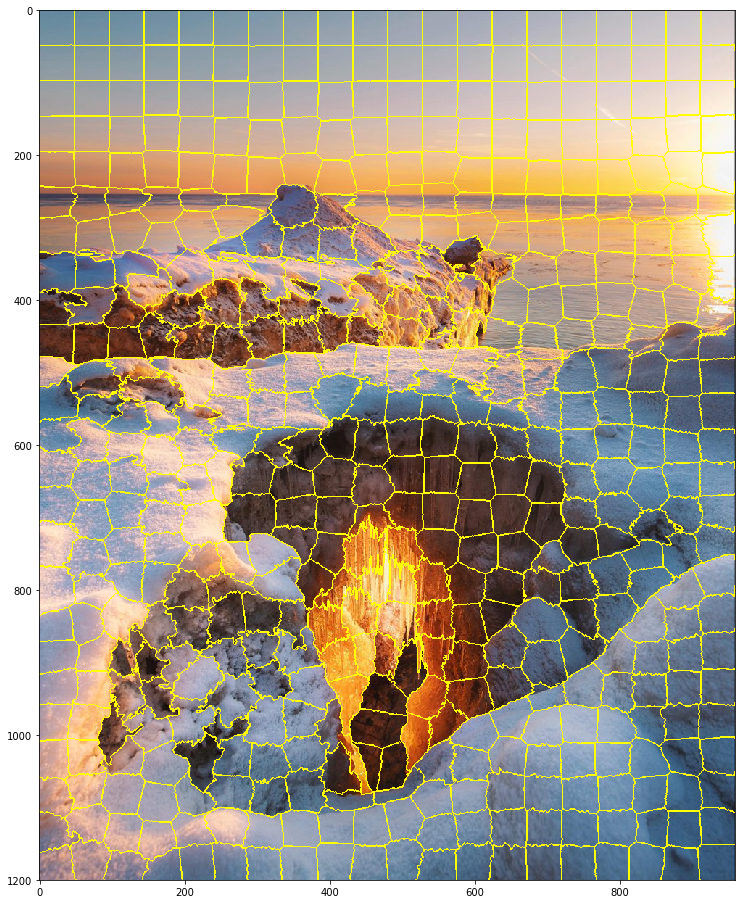

In [91]:
# fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(111)

ax.imshow(mark_boundaries(img, segments))
ax.set_aspect(1)

plt.show()



In [100]:
response[0].user.screen_name

'sue_dee_nym'

In [72]:
[hls_colors[test.labels_ == x][np.argmax(hls_colors[test.labels_ == x][:,2]),] for x in range(7)]

[array([0.1097561 , 0.15490196, 0.51898734]),
 array([0.58558559, 0.70588235, 0.98666667]),
 array([0.55      , 0.05490196, 0.35714286]),
 array([0.36904762, 0.06666667, 0.82352941]),
 array([0.5748503 , 0.68921569, 0.52681388]),
 array([0.0745098 , 0.1745098 , 0.95505618]),
 array([0.09562842, 0.78627451, 0.55963303])]

In [71]:
centers

array([[0.10924794, 0.22726054, 0.26791287],
       [0.60455467, 0.72113483, 0.852198  ],
       [0.57734528, 0.13870619, 0.15889673],
       [0.39070127, 0.09377042, 0.53630715],
       [0.51855133, 0.60828034, 0.22610944],
       [0.06822344, 0.36601307, 0.75970639],
       [0.09385115, 0.47873609, 0.26156044]])

In [28]:
sub

[Status(_api=<tweepy.api.API object at 0x10a940a20>, _json={'created_at': 'Fri Feb 01 03:53:35 +0000 2019', 'id': 1091182750978076672, 'id_str': '1091182750978076672', 'text': 'Hello 👋 @bot_palette https://t.co/5bzKnLNSo0', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'bot_palette', 'name': 'palette_bot', 'id': 1091039378556633088, 'id_str': '1091039378556633088', 'indices': [8, 20]}], 'urls': [], 'media': [{'id': 1091182745366126592, 'id_str': '1091182745366126592', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/DySo7PKVYAAs9F5.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DySo7PKVYAAs9F5.jpg', 'url': 'https://t.co/5bzKnLNSo0', 'display_url': 'pic.twitter.com/5bzKnLNSo0', 'expanded_url': 'https://twitter.com/AGreenDCBike/status/1091182750978076672/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1200, 'h': 1600, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 120